In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set working Directory
%cd '/content/drive/MyDrive/School Stuff'

/content/drive/MyDrive/School Stuff


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Read in data
data = pd.read_csv('diabetic_data.csv', usecols = ['admission_type_id', 'num_medications', 'num_procedures'])
data.head(5)

,admission_type_id,num_procedures,num_medications
0,6,0,1
1,1,0,18
2,1,5,13
3,1,1,16
4,1,0,8


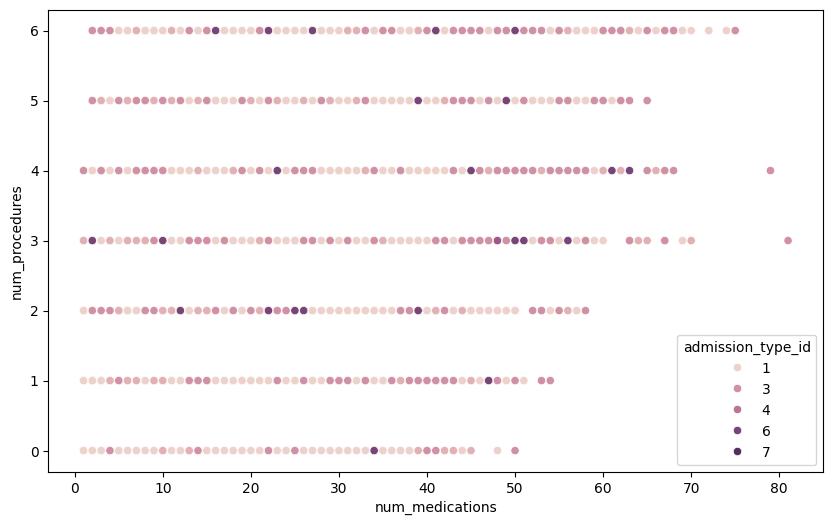

In [ ]:
# Plot points with actual coloring by admission type
plt.figure(figsize=(10, 6))
sns.scatterplot(data = data, x = 'num_medications', y = 'num_procedures', hue = 'admission_type_id')
plt.show()

### Demonstrate K-means clustering

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
#Splitting the data set
X_train, X_test, y_train, y_test = train_test_split(data[['num_medications', 'num_procedures']], data[['admission_type_id']], test_size=0.33, random_state=0)

#Normalizing the training and testing data
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Get K-means and fit on training data
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init=10)
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, n_init=10, random_state=0)

[]

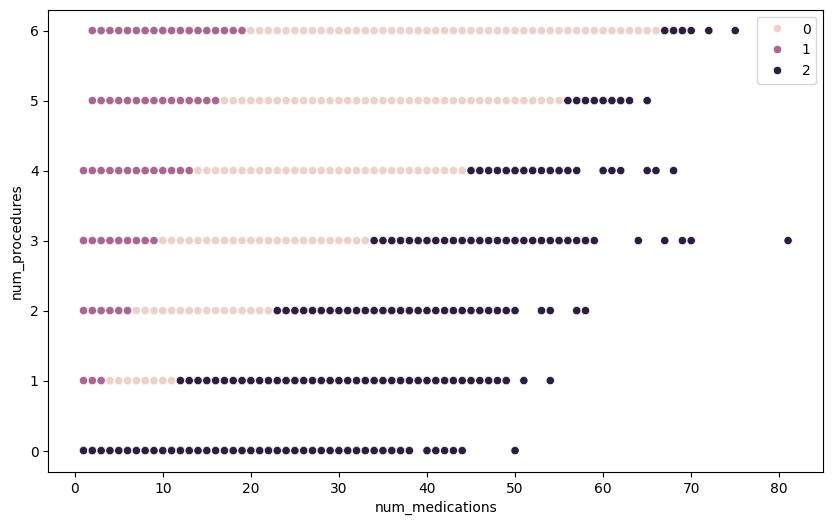

In [ ]:
# Plot with K-means clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X_train, x = 'num_medications', y = 'num_procedures', hue = kmeans.labels_)
plt.plot()

### Calculate Silhouette Score and SSE

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# Loop to get silhouette score and SSE for each K
K = range(3, 10)
fits = []
score = []
sse_values = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init=10).fit(X_train_norm)

    # append the model to fits
    fits.append(model)

    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

    sse = kmeans.inertia_
    sse_values.append(sse)

results = pd.DataFrame({
    'Number_of_Clusters_(k)': K,
    'Sum_of_Squared_Errors_(SSE)': sse_values,
    'Silhouette_Score': score
})

print(results)

   Number_of_Clusters_(k)  Sum_of_Squared_Errors_(SSE)  Silhouette_Score
0                       3                   184.029847          0.675615
1                       4                   184.029847          0.686711
2                       5                   184.029847          0.705387
3                       6                   184.029847          0.727409
4                       7                   184.029847          0.738584
5                       8                   184.029847          0.743719
6                       9                   184.029847          0.746452


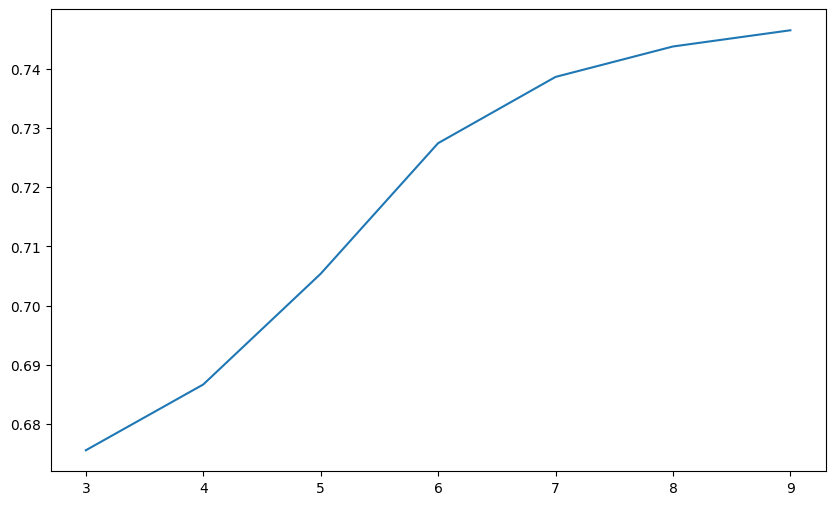

In [ ]:
# Plot elbow plot
plt.figure(figsize=(10, 6))
sns.lineplot(x = K, y = score)
plt.show()

There seems to be a slight elbow curve at 4 which indicates to me that that is the correct K.

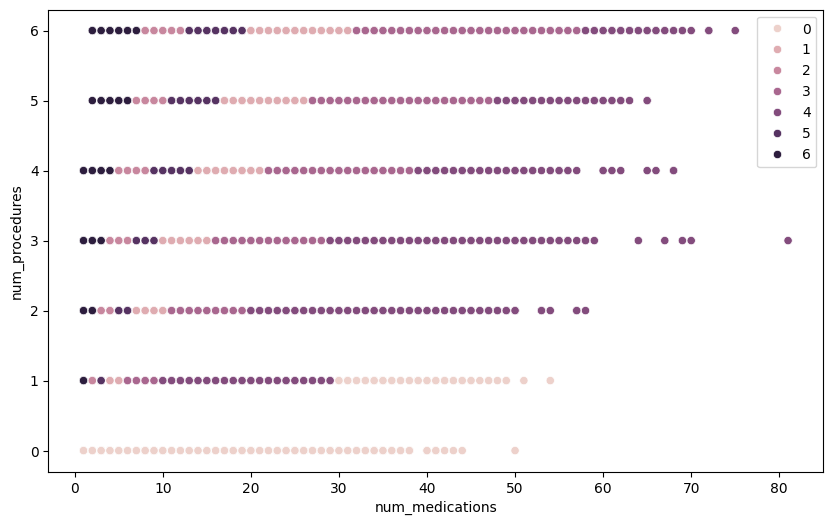

In [ ]:
# Plot points with correct K
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X_train, x = 'num_medications', y = 'num_procedures', hue = fits[4].labels_)
plt.show()

Although these points do not generally cluster well, this seems to be the correct K. There were not many variables in the given data sets that were not categorical so it was slightly difficult to find something that may cluster well.